# W2 Practicals - Supervised Learning
### (k-NN and Decision Trees)

### Aims:
* To apply k-NN and decision trees as examples of supervised learning models for classification and regression problems.
* To get some insight into the trained models, including the influence of a hyperparameter in an ML model.
* To produce some assessable work for this subject.



In [ ]:
# Common Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ANSI color
class color:
  YELLOW_BOLD = '\033[1;33m'
  END = '\033[0m'

### Q1 Make scatterplots of each dataset so you can see what they look like.

In [ ]:
# Sub-Plot Setup
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
fig.subplots_adjust(wspace=15)
fig.lines.append(plt.Line2D([0.5, 0.5], [0, 1], transform=fig.transFigure, color='black', linewidth=1))

# 1st Sub-Plot for W3Classif
CSV_FILE_1 = 'w3classif.csv'
df1 = pd.read_csv(CSV_FILE_1, header=None)
df1.columns = ["Feature1", "Feature2", "Label"]

sns.scatterplot(x=df1["Feature1"],
                y=df1["Feature2"],
                hue=df1["Label"],
                palette="coolwarm",
                alpha=0.7,
                ax=axes[0])
axes[0].set_title("Scatterplot of W3Classif")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# 2nd Sub-Plot for W3Regr
CSV_FILE_2 = 'w3regr.csv'
df2 = pd.read_csv(CSV_FILE_2, header=None)
df2.columns = ["Feature1", "Feature2"]

sns.scatterplot(x=df2["Feature1"],
                y=df2["Feature2"],
                alpha=0.7,
                ax=axes[1])
axes[1].set_title("Scatterplot with W3Regr")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
plt.tight_layout()
# plt.save

### Q2 Randomly shuffle the datasets (i.e. the order of the rows) and split them each into `70% (for training)` and `30% (for testing)`.

In [ ]:
# Specific Imports
from sklearn.model_selection import train_test_split

In [87]:
Xc, yc = df1.iloc[:, :-1].values, df1.iloc[:, -1].values
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

Xr, yr = df2.iloc[:, :-1].values, df2.iloc[:, -1].values
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.3, random_state=42)

### Q3

In [90]:
# Specific Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

#### a. Build a k-NN classifier with `k = 3` for dataset `w3classif.csv` and find the training and test loss (i.e. misclassification rate).

In [148]:
def train_and_predict_knnc(X_train, y_train, X_test, y_test, n_neighbors=3):
  # Make a KNN Classifier and Train it on Dataset
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)

  # Making Predictions
  y_train_pred = knn.predict(X_train)
  y_test_pred = knn.predict(X_test)
  return knn, y_train_pred, y_test_pred

def evaluate_classifier(y_train, y_train_pred, y_test, y_test_pred):
  # Misclassification rate
  train_loss = 1 - accuracy_score(y_train, y_train_pred)
  test_loss = 1 - accuracy_score(y_test, y_test_pred)

  print(f"""
  Misclassification Rate (in %):
    Train Loss: {train_loss*100}%
    Test Loss: {test_loss*100}%
  """)

knnc, yc_train_pred, yc_test_pred = train_and_predict_knnc(Xc_train, yc_train, Xc_test, yc_test)
evaluate_classifier(yc_train, yc_train_pred, yc_test, yc_test_pred)


  Misclassification Rate (in %):
    Train Loss: 4.285714285714281%
    Test Loss: 0.8333333333333304%
  


#### b. Plot the decision regions for your classifier together with the training and/or test data points.

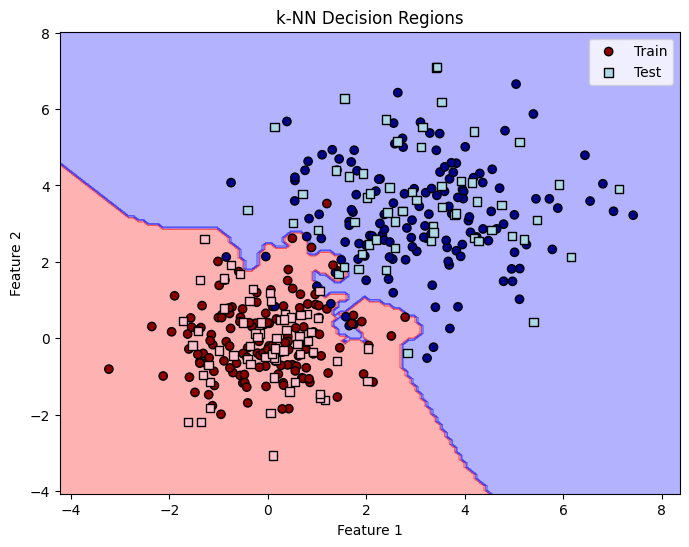

In [150]:
def plot_decision_regions_c(X, y, X_train, y_train, X_test, y_test, classifier):
  # Finding Ranges of Feature1 (f1) and Feature2 (f2), and a feature space
  f1_min, f1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  f2_min, f2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  f1r, f2r = np.meshgrid(np.arange(f1_min, f1_max, 0.1),
                         np.arange(f2_min, f2_max, 0.1))

  # Predicting class labels for grid points
  Z = classifier.predict(np.c_[f1r.ravel(), f2r.ravel()])
  Z = Z.reshape(f1r.shape)

  # Plotting Decision Boundaries
  plt.figure(figsize=(8, 6))
  plt.contourf(f1r, f2r, Z, alpha=0.3,
               cmap=ListedColormap(['red', 'blue']))
  plt.scatter(X_train[:, 0], X_train[:, 1],
              c=y_train, cmap=ListedColormap(['darkred', 'darkgreen', 'darkblue']),
              edgecolor='k', label='Train')
  plt.scatter(X_test[:, 0], X_test[:, 1],
              c=y_test, cmap=ListedColormap(['pink', 'lightgreen', 'lightblue']),
              edgecolor='k', marker='s', label='Test')
  plt.title('k-NN Decision Regions')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.show()

plot_decision_regions_c(Xc, yc, Xc_train, yc_train, Xc_test, yc_test, knnc)

#### c. Experiment with different k values and see how it affects the loss values and the decision regions.

Evaluation and Decision Regions for 1NN Classifier

  Misclassification Rate (in %):
    Train Loss: 0.0%
    Test Loss: 1.6666666666666718%
  


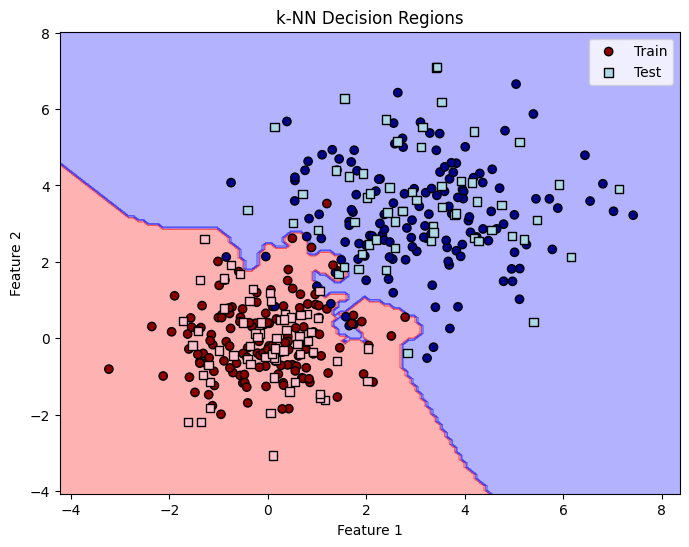

Evaluation and Decision Regions for 2NN Classifier

  Misclassification Rate (in %):
    Train Loss: 3.9285714285714257%
    Test Loss: 2.500000000000002%
  


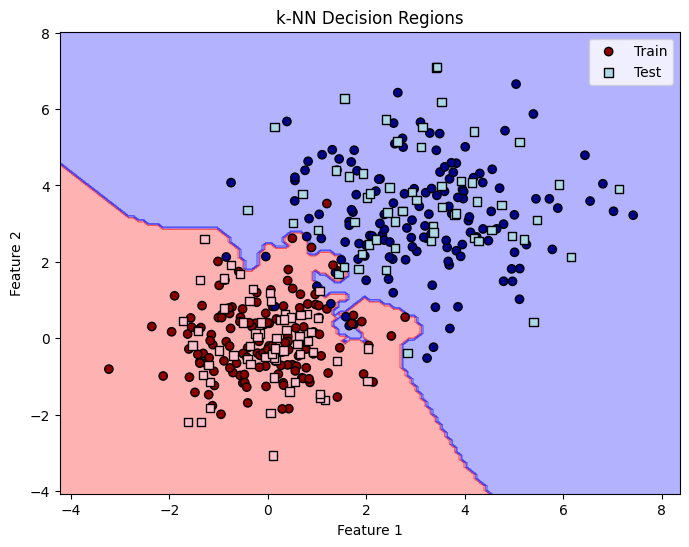

In [149]:
for i in range(1,3):
  knn, yc_train_pred, yc_test_pred = train_and_predict_knnc(Xc_train, yc_train, Xc_test, yc_test, n_neighbors=i)
  print(f"{color.YELLOW_BOLD}Evaluation and Decision Regions for {i}NN Classifier{color.END}")
  evaluate_classifier(yc_train, yc_train_pred, yc_test, yc_test_pred)
  plot_decision_regions_c(Xc, yc, Xc_train, yc_train, Xc_test, yc_test, knnc)

### Q4

In [88]:
from sklearn.neighbors import KNeighborsRegressor

#### a. Build a k-NN regression model with `k = 3` for dataset `w3regr.csv` and find the training and test loss (i.e. sum of squared error).

In [145]:
def train_and_predict_knnr(X_train, y_train, X_test, y_test, n_neighbors=3):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    return knn, y_train_pred, y_test_pred

def evaluate_regressor(y_train, y_train_pred, y_test, y_test_pred):
    train_sse = np.sum((y_train - y_train_pred) ** 2)
    test_sse = np.sum((y_test - y_test_pred) ** 2)

    print(f"""
    Sum of Squared Errors (SSE):
      Training Loss: {train_sse}
      Test Loss: {test_sse}
    """)

knnr, yr_train_pred, yr_test_pred = train_and_predict_knnr(Xr_train, yr_train, Xr_test, yr_test)
evaluate_regressor(yr_train, yr_train_pred, yr_test, yr_test_pred)


    Sum of Squared Errors (SSE):
      Training Loss: 6222.444757937379
      Test Loss: 13820.78366886755
    


#### b. Plot the training and/or test data together with the predicted “function” of the model.

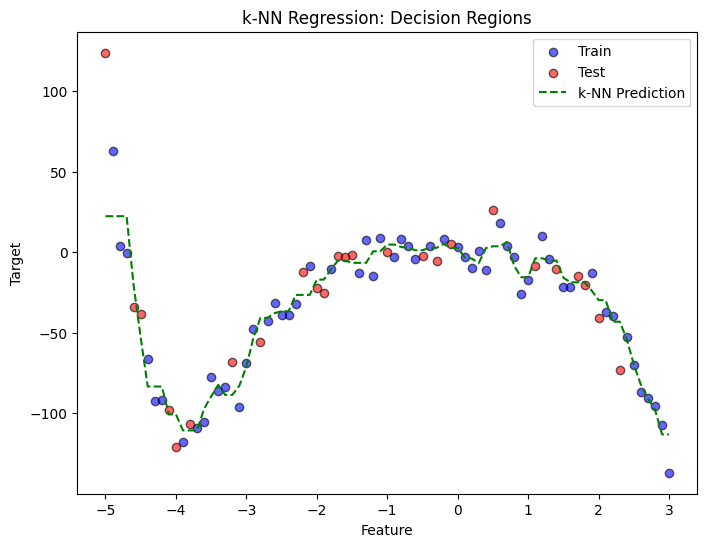

In [146]:
def plot_decision_regions_r(X, y, X_train, y_train, X_test, y_test, classifier):
  # Plotting Decision Boundaries
  plt.figure(figsize=(8, 6))
  plt.scatter(Xr_train, yr_train, color="blue",
              edgecolor='k', label='Train', alpha=0.6)
  plt.scatter(Xr_test, yr_test, color="red",
              edgecolor='k', label='Test', alpha=0.6)

  X_sorted = np.sort(np.vstack((Xr_train, Xr_test)), axis=0)
  y_pred_sorted = classifier.predict(X_sorted)
  plt.plot(X_sorted, y_pred_sorted, color="green", linestyle="--", label="k-NN Prediction")

  plt.title('k-NN Regression: Decision Regions')
  plt.xlabel('Feature')
  plt.ylabel('Target')
  plt.legend()
  plt.show()

plot_decision_regions_r(Xr, yr, Xr_train, yr_train, Xr_test, yr_test, knnr)

#### c. Experiment with different k values and see how it affects the loss values and the predicted function.

Evaluation and Decision Regions for 1NN Regressors

    Sum of Squared Errors (SSE):
      Training Loss: 0.0
      Test Loss: 11141.474374834064
    


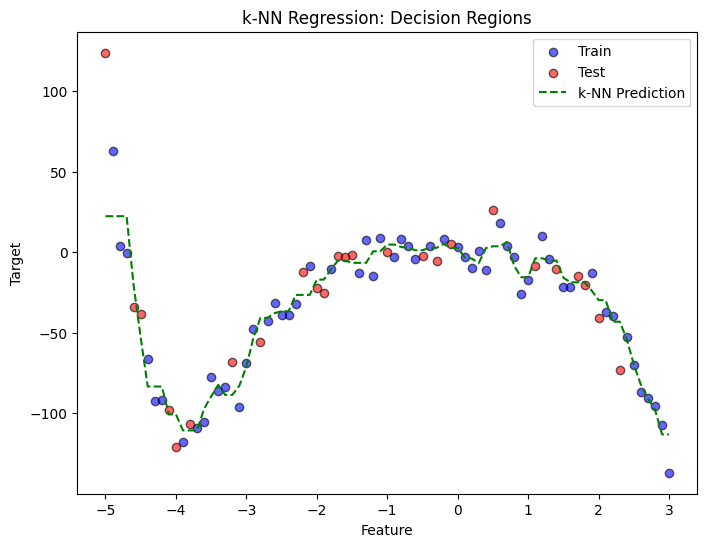

Evaluation and Decision Regions for 2NN Regressors

    Sum of Squared Errors (SSE):
      Training Loss: 3737.9868131554304
      Test Loss: 13165.280984389228
    


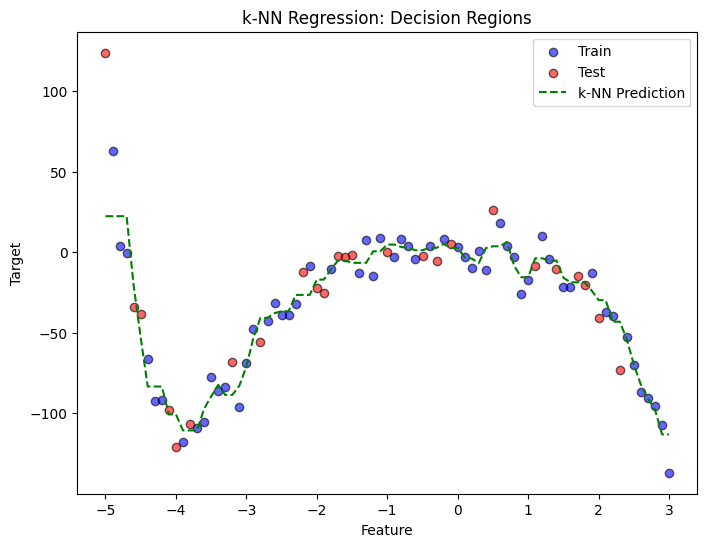

In [147]:
for i in range(1,3):
  knn, yr_train_pred, yr_test_pred = train_and_predict_knnr(Xr_train, yr_train, Xr_test, yr_test, n_neighbors=i)
  print(f"{color.YELLOW_BOLD}Evaluation and Decision Regions for {i}NN Regressors{color.END}")
  evaluate_regressor(yr_train, yr_train_pred, yr_test, yr_test_pred)
  plot_decision_regions_r(Xr, yr, Xr_train, yr_train, Xr_test, yr_test, knnr)

### Q5

In [115]:
from sklearn.tree import DecisionTreeClassifier

#### a. Build a decision tree classifier for dataset w3classif.csv and find the training and test loss (i.e. misclassification rate).

In [160]:
def train_and_predict_clf(X_train, y_train, X_test, y_test, max_depth=3):
  # Make a Decision Tree Classifier and Train it on Dataset
  clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  clf.fit(X_train, y_train)

  # Making Predictions
  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)
  return clf, y_train_pred, y_test_pred

clfc, yc_train_pred, yc_test_pred = train_and_predict_clf(Xc_train, yc_train, Xc_test, yc_test)
evaluate_classifier(yc_train, yc_train_pred, yc_test, yc_test_pred)


  Misclassification Rate (in %):
    Train Loss: 4.285714285714281%
    Test Loss: 1.6666666666666718%
  


#### b. Plot the decision regions for your classifier together with the training and/or test data points.

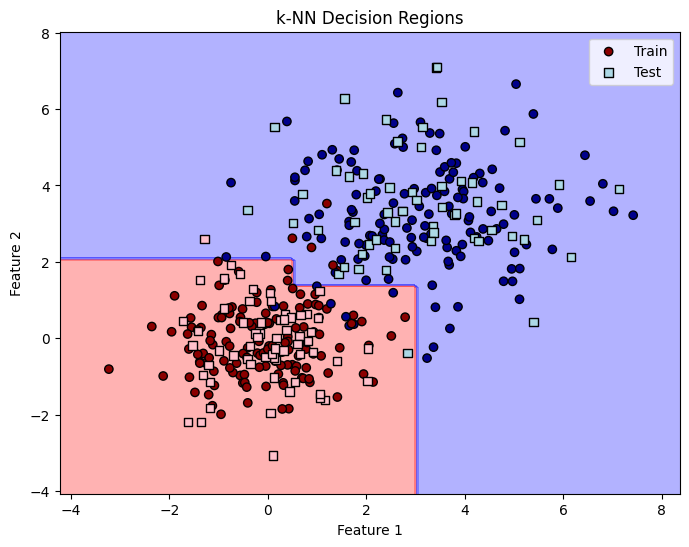

In [162]:
plot_decision_regions_c(Xc, yc, Xc_train, yc_train, Xc_test, yc_test, clfc)

#### c. Experiment with different maximum depth values and see how it affects the loss values and the decision regions.


  Misclassification Rate (in %):
    Train Loss: 8.214285714285719%
    Test Loss: 5.833333333333335%
  


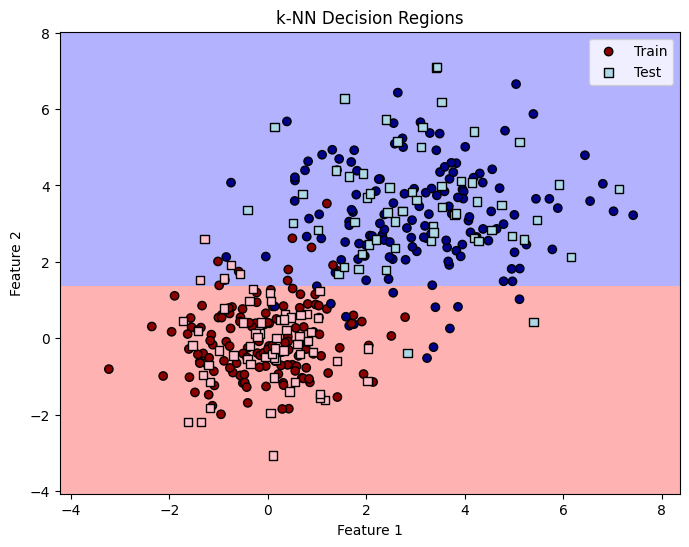


  Misclassification Rate (in %):
    Train Loss: 5.35714285714286%
    Test Loss: 2.500000000000002%
  


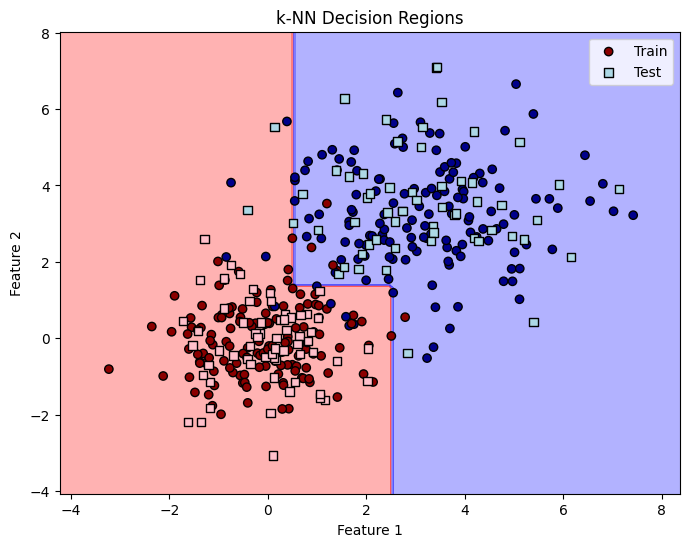

In [164]:
for i in range(1,3):
  clfc, yc_train_pred, yc_test_pred = train_and_predict_clf(Xc_train, yc_train, Xc_test, yc_test, max_depth=i)
  evaluate_classifier(yc_train, yc_train_pred, yc_test, yc_test_pred)
  plot_decision_regions_c(Xc, yc, Xc_train, yc_train, Xc_test, yc_test, clfc)

## **References**:
1. “matplotlib.pyplot.subplots — Matplotlib 3.6.0 documentation,” matplotlib.org. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
2. “sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.22.1 documentation,” Scikit-learn.org, 2019. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
3. “sklearn.neighbors.KNeighborsRegressor — scikit-learn 0.22 documentation,” Scikit-learn.org, 2019. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
‌